## Task 2 CNN
### Question 2

First we import all the necessary libraries 
- wget - to download the dataset
- idx2numpy - to convert dataset from idx to numpy array form 
- numpy - for handling data 
- cv2 - for resizing image 
- scikit-learn - for train test split and measuring accuracy 
- tensorflow - for CNN 
- matplotlib - to plot graphs 
 

First, we use wget to download the dataset and save it in the current working directory.

In [ ]:
import wget
url = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
wget.download(url, '/Users/vaibhavmalhotra/Desktop/MIDAS 2/a')
url = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
wget.download(url, '/Users/vaibhavmalhotra/Desktop/MIDAS 2/a')
url = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
wget.download(url, '/Users/vaibhavmalhotra/Desktop/MIDAS 2/a')
url = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
wget.download(url, '/Users/vaibhavmalhotra/Desktop/MIDAS 2/a')

Now, in terminal we use gunzip to unzip these files. This part is not shown as this is done in terminal and is pretty straightforward. The command is 


```
gunzip t*-ubyte.gz
```

Now, we import all the necessary libraries. 





In [ ]:
import idx2numpy
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D

Now, I used idx2numpy to convert all the training data from idx to numpy array and store them in variables. These can now be used like any other dataset which is stored in numpy array. 

In [ ]:
train_images = idx2numpy.convert_from_file("/Users/vaibhavmalhotra/Desktop/MIDAS 2/train-images-idx3-ubyte")
test_images = idx2numpy.convert_from_file("/Users/vaibhavmalhotra/Desktop/MIDAS 2/t10k-images-idx3-ubyte")
train_labels = idx2numpy.convert_from_file("/Users/vaibhavmalhotra/Desktop/MIDAS 2/train-labels-idx1-ubyte")
test_labels = idx2numpy.convert_from_file("/Users/vaibhavmalhotra/Desktop/MIDAS 2/t10k-labels-idx1-ubyte")

Here, I loaded the model from the first part. Then I displayed its summary to ensure that the correct model is imported. 

In [ ]:
model = load_model("/Users/vaibhavmalhotra/Desktop/MIDAS 2/Q1_model.h5")
model.summary()

Now, I convert y_train and y_test to one hot encoded data so that it can be used in training. This is done using scikit learn function to_categorical().

In [ ]:
y_train = to_categorical(train_labels, num_classes=62, dtype='int64')
y_test = to_categorical(test_labels, num_classes=62, dtype='int64')

Now, this block of code is used to preprocess the training images. We resize the images to 50 x 50, like in Part I. 

Then we append them into X_train and X_test for training and testing respectively. 

In [ ]:
dim = 50
X_train =[]
for img in train_images:
    img_resize = cv2.resize(img, (dim, dim))
    X_train.append(img_resize)

X_test = []
for img in test_images:
    img_resize = cv2.resize(img, (dim, dim))
    X_test.append(img_resize)

Now, X_train and X_test are lists and we need to convert them into numpy arrays so that we can apply ML model on them. This is done in this block of code.

In [ ]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)

Now, we train the predefined model on the new dataset. Both models are trained for 100 epochs to ensure that convergence is reached and we can do our analysis correctly on the two models. 

The model reaches a training accuracy of 99% and a testing accuracy of 98%. 

In [ ]:
hist = model.fit(X_train, y_train,  epochs = 100, validation_data = (X_test, y_test))

Here, we define the model from Part I, so that it is initialized with random variables. Then the model is compiled. 

This model is exactly same as the one used in Part I, and above.

In [ ]:
model1 = Sequential()
model1.add(Conv1D(32,kernel_size = (5), padding ='valid',activation = 'relu', input_shape = (dim, dim)))
model1.add(MaxPooling1D(pool_size = (2)))

model1.add(Conv1D(64,kernel_size = (5), padding ='same',activation = 'relu'))
model1.add(MaxPooling1D(pool_size = (2)))

model1.add(Conv1D(64,kernel_size = (3), padding ='same',activation = 'relu'))
model1.add(MaxPooling1D(pool_size = (2)))

model1.add(Dropout(0.05))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add(Dropout(0.1))

model1.add(Dense(62, activation = 'softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.005)

model1.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

Now, we train the randomly initialized model. This model is also trained for 100 epochs.

This model reaches a training accuracy of 99% and testing accuracy of 98% just like the earlier one. So, we can conclude both the models trained to around the accuracy. 

In [ ]:
hist1 = model1.fit(X_train, y_train,  epochs = 100, validation_data = (X_test, y_test))

The accuracy of the pretrained model is plotted on a graph. First the model was run for 50 epochs but convergence wasn't reached by 50 epochs as we can see the graph isn't exactly flat but a little slope is seen.

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

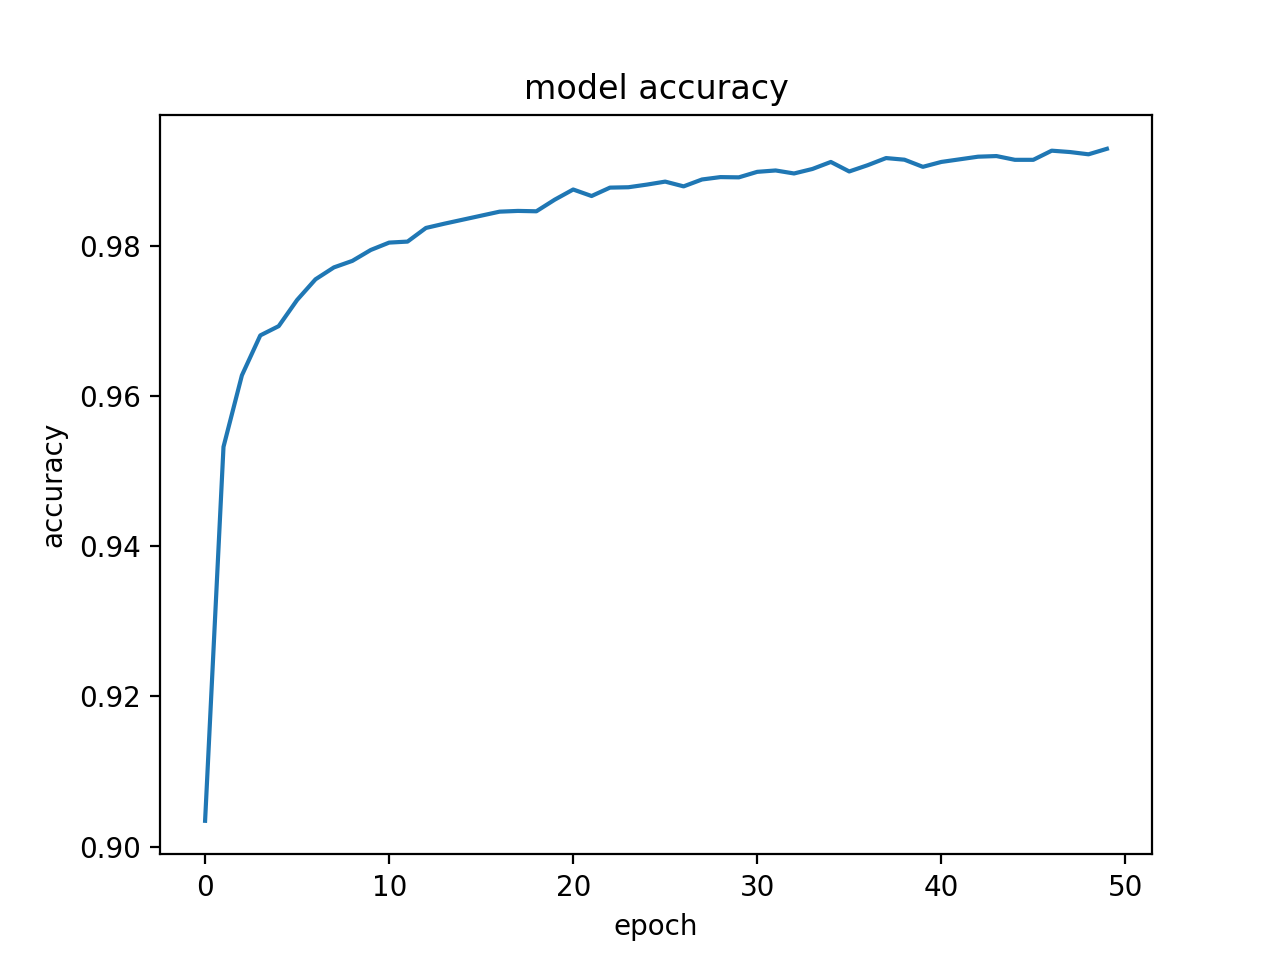

Then the model was trained for 100 epochs. We can see convergence is reached by around 60 epochs.

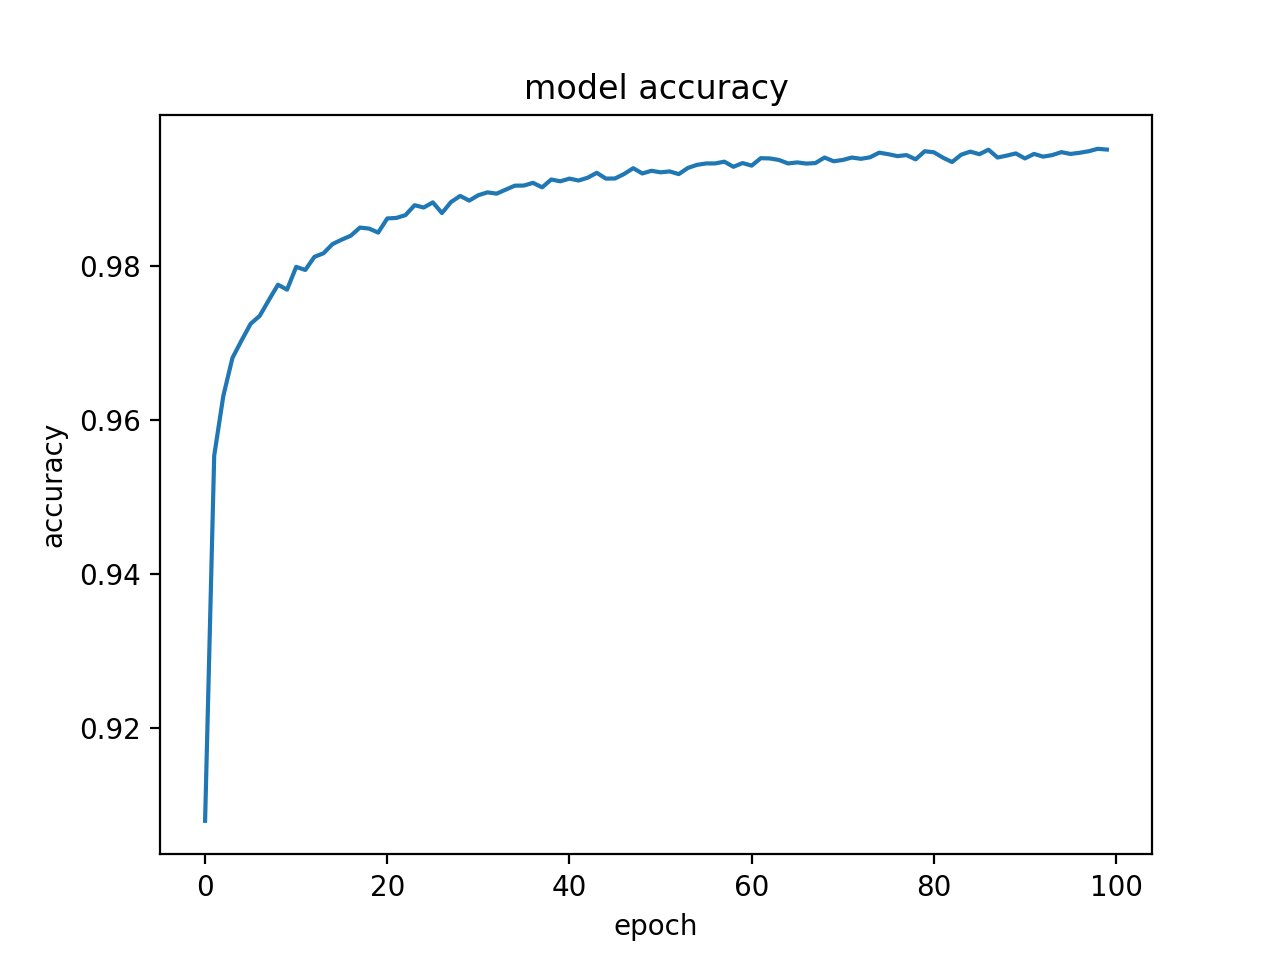

Similarly, graphs for 50 epochs and 100 epochs are plotted for randomly initialized dataset as well.

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

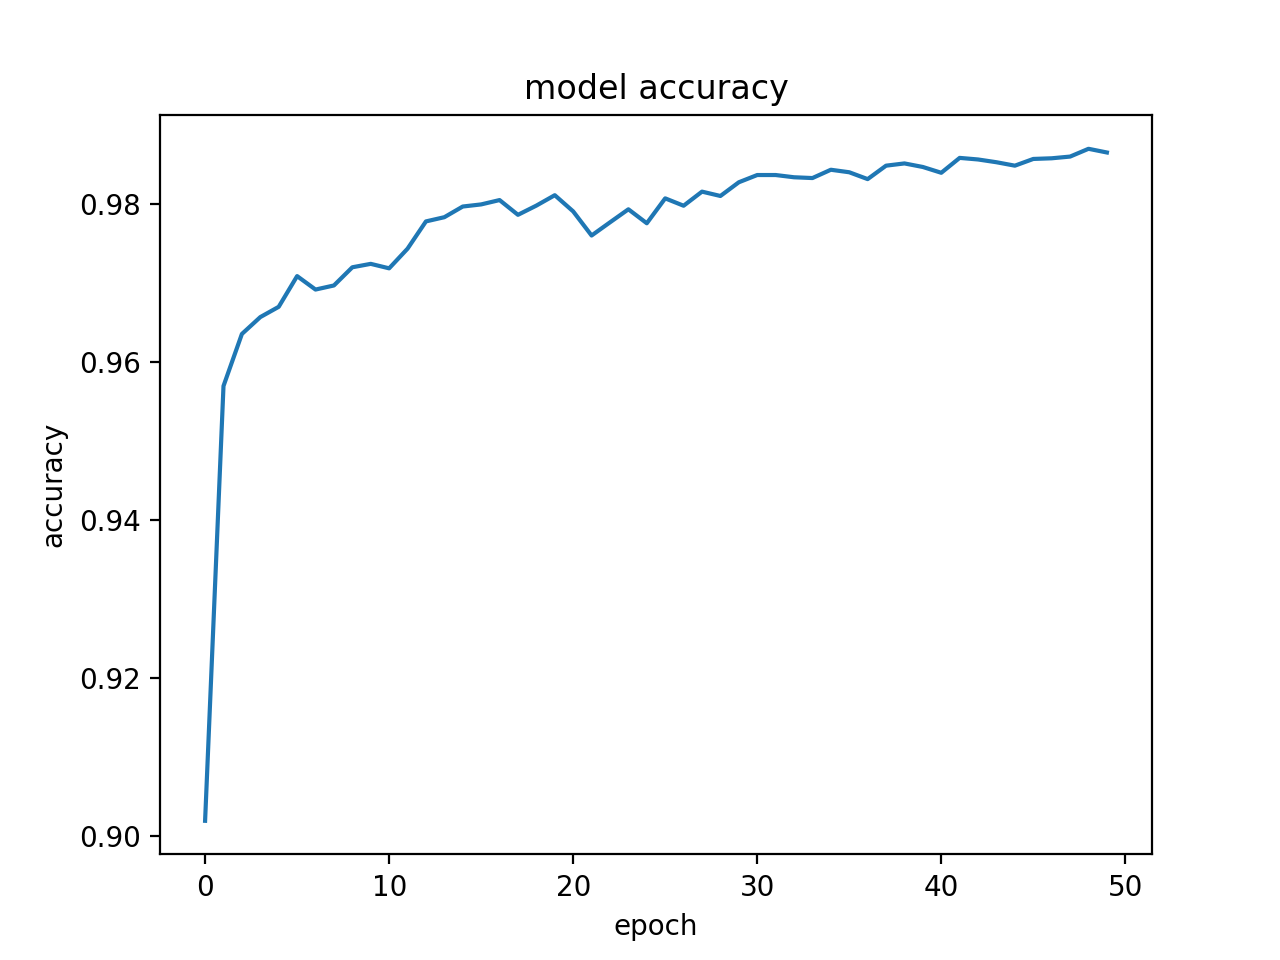

The graph for 100 epochs is shown below.

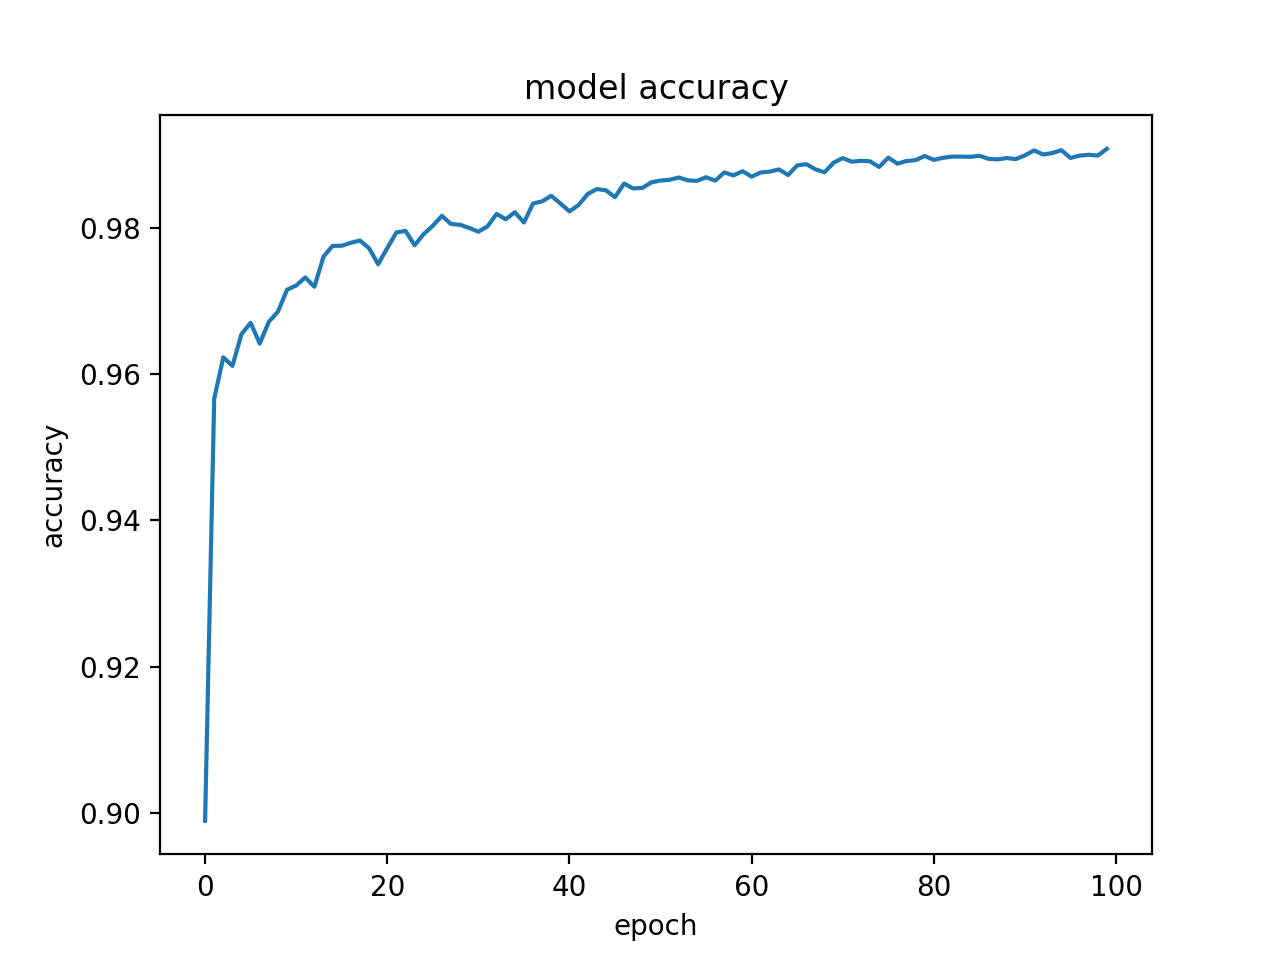

Now, we plot a graph on accuracy of both models for 100 epochs on the same graph to get a better picture of what's hapenning.

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained', 'Random'], loc='upper left')
plt.show()

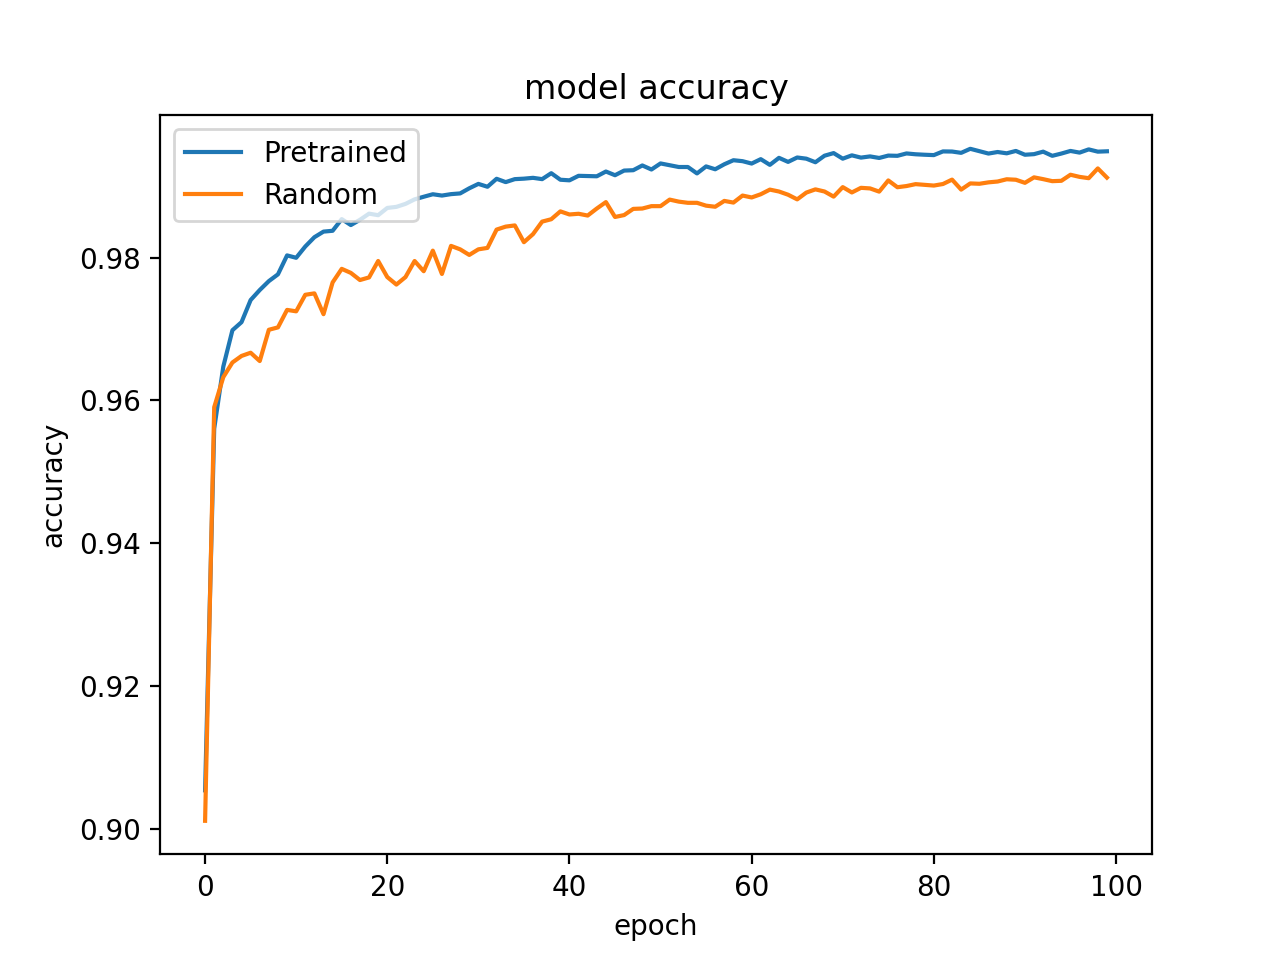

# Analysis
We have seen above that both models show almost same testing and training accuracy, but in the graph we can see that the accuracy for Pretrained model is slightly higher. This behaviour is justified is we consider how CNN works.

CNN are comprised of convolution networks. What hapenns in convolution networks is that there are filters which go over the network and try to learn the features before sending the image to dense neural network layer.

So what essentially happens is that the model tries to learn small features and then tries to identify the whole image based on that. 

For example, if a model is learning to recognise digit '8', then the first layer will learn circular lines and straight lines, then the next layer will try to learn circles from those circular lines, then the network will try to learn the figure 8. This is not a steadfast rule but one approach that can be taken by the network. 

So, if the consider this, it becomes quite apparant which network will achive convergence first and show more accuracy. This is also evident from the graph which shows accuracy of both models. We can see that pretrained model reached convergence at around epoch 40 and randomly initialised model reached its convergence around epoch 50-60. 

Also, the pretrained model always had a higher accuracy on every epoch as compared to randomly initialised one. 

This is most probably due to the fact that the pretrained model was trained on a similar dataset which also had handwritten data. Due to this, it had already learned the features and it only needed to fine-tune those features for this data while the new model had to learn all the features from begining.

Hence, it took longer time to reach its convergence and had slightly poorer accuracy than its counterpart. 